In [95]:
import numpy as np
import matplotlib.pyplot as plt

In [96]:
# INPUT DATA
P = np.array(
    [
        [0.7, 0.2],
        [-0.1, 0.9],
        [-0.3, 0.3],
        [0.1, 0.2],
        [0.5, -0.5]
    ])
# DESIRED OUTPUT
T = np.array([1, 1, 0, 0, 0])

# INITIAL WEIGHTS
W = np.array([0, 0])
b = -1

In [97]:
def hardlim(A, threshold=0):
    return (A > threshold) * 1

In [98]:
n_epochs = 0
maximum_epoch = 100
Y = hardlim(W.dot(P.T) + b)

while np.any(Y != T) and n_epochs < maximum_epoch:
    Y = hardlim(W.dot(P.T) + b)

    E = T - Y
    dW = E.dot(P)
    db = sum(E)
    W = W + dW
    b = b + db

    n_epochs += 1
    print(f'epochs: {n_epochs}')
    print(f'W: {W}, b: {b}')
    print()


epochs: 1
W: [0.6 1.1], b: 1

epochs: 2
W: [0.3 1.1], b: -2

epochs: 3
W: [0.9 2.2], b: 0

epochs: 4
W: [1.1 1.7], b: -2

epochs: 5
W: [1.7 2.8], b: 0

epochs: 6
W: [1.9 2.3], b: -2

epochs: 7
W: [2.5 3.4], b: 0

epochs: 8
W: [2.7 2.9], b: -2

epochs: 9
W: [2.7 2.9], b: -2



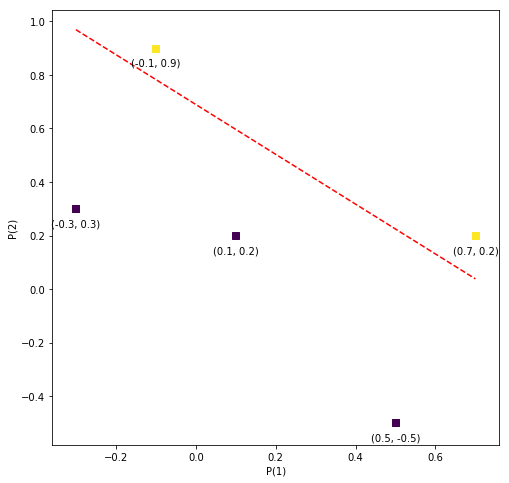

In [99]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.scatter(P[:, 0], P[:, 1], c=T, marker='s', s=50)
for p in P:
    plt.annotate(
        '(%s, %s)' % (p[0], p[1]), 
        xy=(p[0], p[1]), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top')
plt.xlabel('P(1)')
plt.ylabel('P(2)')

# DECISION BOUNDARY
P1_range = np.arange(min(P[:, 0]), max(P[:, 0] + 0.1), 0.1)
P2_range = -1 * (W[0] * P1_range + b) / W[1]
plt.plot(P1_range, P2_range, 'r--')